In [1]:
# use random forest to predict the linear velocity and angular velocity of the robot
# Path: Random Forest.ipynb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('navigation_all.csv')

dataset.head(10)

# set vel_linear and vel_angular as labels and turn them into numpy arrays
y = dataset[['vel_linear', 'vel_angular']].values

# drop the labels from the dataset
dataset = dataset.drop(['vel_linear', 'vel_angular'], axis=1)

# turn the dataset into numpy arrays
X = dataset.values

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# import the random forest model
from sklearn.ensemble import RandomForestRegressor

# create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# import the metrics
from sklearn import metrics

# print the metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 0.1231571428571429
Mean Squared Error: 0.03909034571428572
Root Mean Squared Error: 0.19771278591503819


In [2]:
print('Accuracy:', model.score(X_test, y_test))

Accuracy: 0.8282531571727112


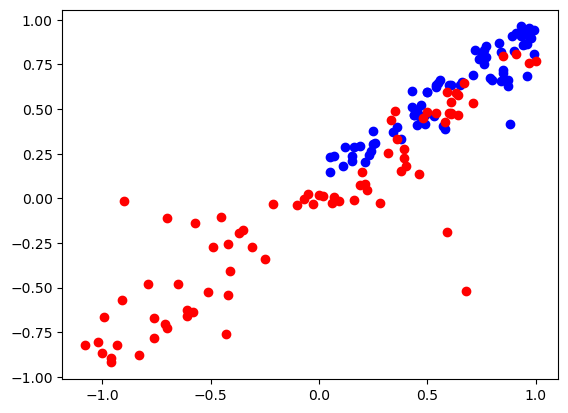

In [3]:
# print the graph
import matplotlib.pyplot as plt
plt.scatter(y_test[:,0], y_pred[:,0], color='blue')
plt.scatter(y_test[:,1], y_pred[:,1], color='red')
plt.show()



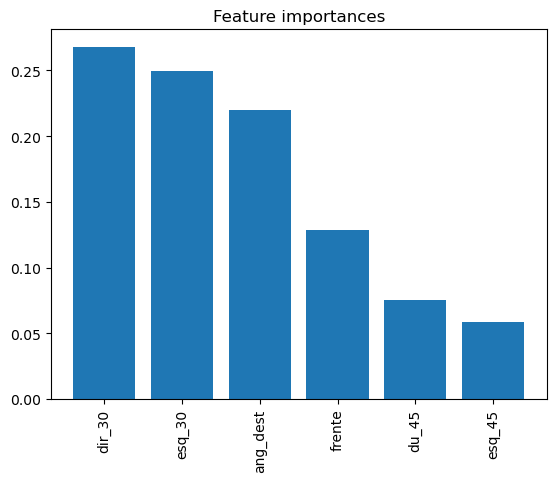

In [4]:
# get the X importances
importances = model.feature_importances_

# get the indices of the X importances
indices = np.argsort(importances)[::-1]

# get the names of the X importances
names = [dataset.columns[i] for i in indices]

# plot the X importances
plt.figure()

# create the title
plt.title("Feature importances")

# add the bars
plt.bar(range(dataset.shape[1]), importances[indices])

# add the X labels
plt.xticks(range(dataset.shape[1]), names, rotation=90)

# show the plot
plt.show()

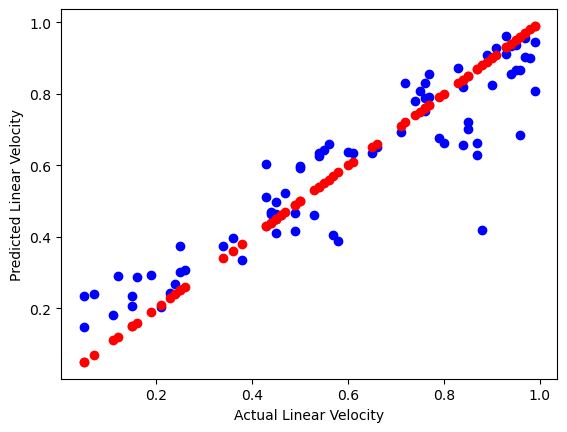

In [5]:
# plot ALL the actual values (sum of the two labels)
plt.scatter(y_test[:,0] + y_test[:,1], y_pred[:,0] + y_pred[:,1], color='blue')

# show the plot
plt.show()

